# Visualizations of convolutional tracking models

In this notebook I'll develop some visualizations of my convolutional models. I'll try to do some visualizations of the 3D filters, but if they just don't look good then I can go back to some 2D models.

In [4]:
# System imports
from __future__ import print_function

# External imports
import numpy as np
from keras import models
import matplotlib.pyplot as plt

# Local imports
from models import build_conv_model

%matplotlib notebook

## Load a 3D convolutional model

In [ ]:
# Create a new, untrained model
det_shape = (10, 32, 32)
model = build_conv_model(det_shape)

# Load a pre-trained keras model
#filepath = '/home/sfarrell/trackml/run/outputs_t0/conv/model.h5'
#model = models.load_model(filepath)

In [8]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 10, 32, 32)    0                                            
____________________________________________________________________________________________________
reshape_1 (Reshape)              (None, 1, 10, 32, 32) 0           input_1[0][0]                    
____________________________________________________________________________________________________
convolution3d_1 (Convolution3D)  (None, 8, 10, 32, 32) 224         reshape_1[0][0]                  
____________________________________________________________________________________________________
convolution3d_2 (Convolution3D)  (None, 8, 10, 32, 32) 1736        convolution3d_1[0][0]            
___________________________________________________________________________________________

In [119]:
w = model.get_weights()
print(len(w))
print(w[0].shape, w[1].shape)

filters = np.squeeze(w[0])
print(filters.shape)

22
(8, 1, 3, 3, 3) (8,)
(8, 3, 3, 3)


<IPython.core.display.Javascript object>


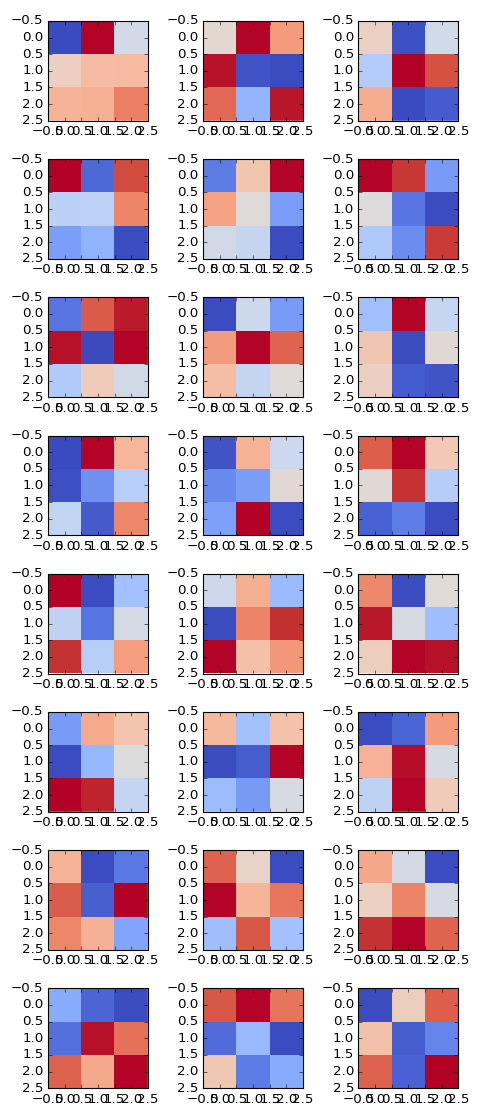

In [20]:
nrows, ncols = 8, 3

plt.figure(figsize=(6,14))

for ifilt in range(nrows):
    for islice in range(ncols):
        plt.subplot(nrows, ncols, ifilt*ncols + islice + 1)
        plt.imshow(filters[ifilt, islice], interpolation='none', cmap='coolwarm')
plt.tight_layout()

## 3D visualization of filters

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [120]:
def draw_3d_filters(filters, figsize=(10,12),
                    nrows=4, ncols=2,
                    cmap=cm.coolwarm, alpha=0.8,
                    view_elev=20, view_azim=330):
    """Draw 3D filter planes"""
    fig = plt.figure(figsize=figsize)
    px, py = np.meshgrid(range(filters.shape[2]+1), range(filters.shape[3]+1))
    for i in range(filters.shape[0]):
        ax = fig.add_subplot(nrows, ncols, i + 1, projection='3d')
        filt = filters[i]
        for j in range(filters.shape[1]):
            colors = filt / filt.max()
            ax.plot_surface(px, j, py, rstride=1, cstride=1, shade=False,
                            facecolors=cmap(colors[j]), alpha=alpha)
        ax.set_title('Filter %i' % i)
        ax.view_init(elev=view_elev, azim=view_azim)
        plt.axis('off')
    plt.tight_layout()
    return fig

<IPython.core.display.Javascript object>


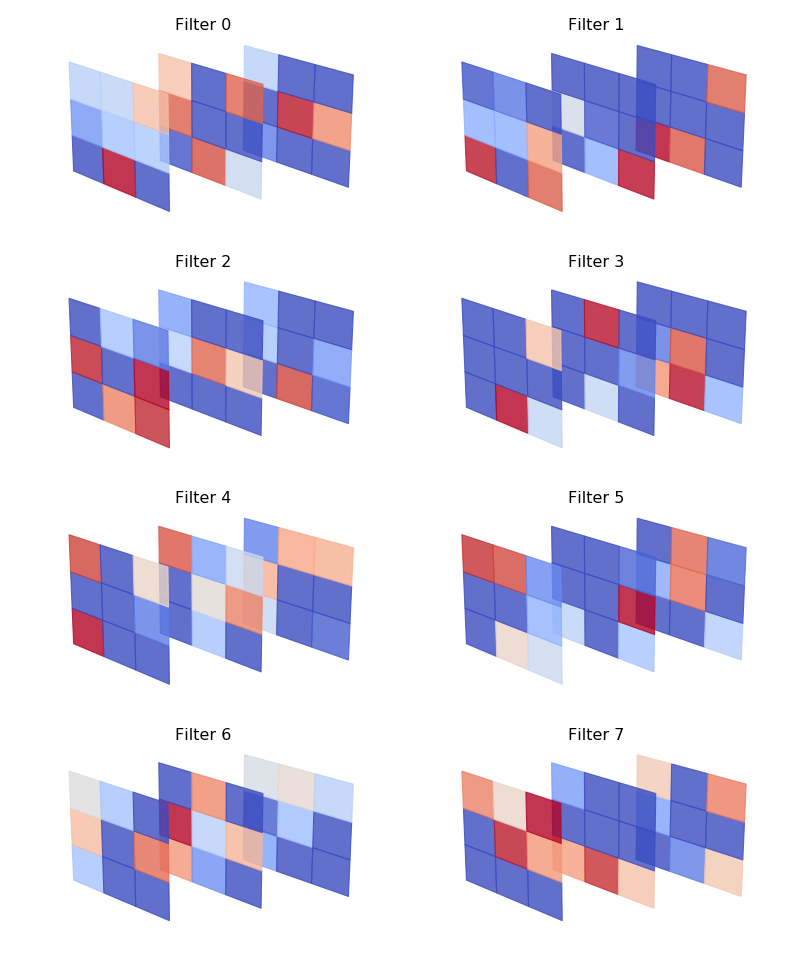

In [121]:
fig = draw_3d_filters(filters)